## Gather the data

In [1]:
import numpy as np
import pickle
from simtk.openmm import unit
from openmmtools.constants import kB
import pandas as pd

import matplotlib.pyplot as plt
KT_KCALMOL = kB * 300 * unit.kelvin / unit.kilocalories_per_mole

In [2]:
def compute_ddg(apo_dg, complex_dg):
    return complex_dg * KT_KCALMOL - apo_dg * KT_KCALMOL

def compute_error(apo_ddg, complex_ddg):
    return (apo_ddg**2 + complex_ddg**2)**0.5 * KT_KCALMOL

In [3]:
# Retrieve free energies

main_dir_og = 47
main_dir_og2 = 45
main_dir_rest = 52
sub_dirs = list(range(0, 4)) + list(range(5, 12)) + list(range(13, 17)) + list(range(18, 28))

d_results = {}
for sub_dir in sub_dirs:
    d_results[sub_dir] = {}
    for phase in ['apo', 'complex']:
        if phase == "complex":
            length = 10
            main_dir = main_dir_rest
            if sub_dir in [19, 21]:
                replicate = 1
            else:
                replicate = 0
        else:
            length = 10
            main_dir = main_dir_og
            replicate = 1
            
        with open(f"/data/chodera/zhangi/perses_benchmark/repex/perses-bnbs-paper-fourth-attempt/{main_dir}/{sub_dir}/replicate_{replicate}/{phase}_free_energy_bootstrapped_{length}ns.pickle", "rb") as f:
            results = pickle.load(f)
            d_results[sub_dir][phase] = results

d_mapping = {4: 11, 12: 10, 17: 9}
for sub_dir in d_mapping.keys():
    d_results[sub_dir] = {}
    for phase in ['apo', 'complex']:
        if phase == "complex":
            length = 10
            main_dir = main_dir_rest
            sub_dir_final = sub_dir
            replicate = 0
        else:
            length = 10
            main_dir = main_dir_og2
            sub_dir_final = d_mapping[sub_dir]
            if sub_dir_final == 11:
                replicate = 0
            else:
                replicate = 1
        
        with open(f"/data/chodera/zhangi/perses_benchmark/repex/perses-bnbs-paper-fourth-attempt/{main_dir}/{sub_dir_final}/replicate_{replicate}/{phase}_free_energy_bootstrapped_{length}ns.pickle", "rb") as f:
            results = pickle.load(f)
            d_results[sub_dir][phase] = results
        

In [4]:
# Format the data appropriately for cinnabar

titles = ["Y29F", "Y29A",  "W38F", "T42A", "W44F", "E76A", "E80A", "D35A", "D39A", "K27A", "R59A", "R83Q", "R87A", "H102A", "F29Y", "A29Y",  "F38W", "A42T", "F44W", "A76E", "A80E", "A35D", "A39D", "A27K", "A59R", "Q83R", "A87R", "A102H"]

to_plot = []

for sub_dir in range(28):
    ddg = compute_ddg(d_results[sub_dir]['apo']["Deltaf"][0, -1], d_results[sub_dir]['complex']["Deltaf"][0, -1])
    dddg = compute_error(d_results[sub_dir]['apo']["dDeltaf"][0, -1], d_results[sub_dir]['complex']["dDeltaf"][0, -1])
    if sub_dir in range(14):
        to_plot.append([titles[sub_dir][:-1], titles[sub_dir][-1] + titles[sub_dir][1:-1], ddg, dddg*2, 0])
    else:
        to_plot.append(["-" + titles[sub_dir][:-1], "-" + titles[sub_dir][-1] + titles[sub_dir][1:-1], ddg * -1, dddg*2, 0])


In [5]:
to_plot

[['Y29', 'F29', 1.0906129225655405, 1.2812391711471762, 0],
 ['Y29', 'A29', 1.90060913897371, 1.243880064365591, 0],
 ['W38', 'F38', 0.632680765107425, 1.3774280823668614, 0],
 ['T42', 'A42', 0.470762469849042, 0.8696295151633925, 0],
 ['W44', 'F44', 0.03849039120802805, 1.6311442022641551, 0],
 ['E76', 'A76', 0.6362685149567893, 2.0012736014326613, 0],
 ['E80', 'A80', 0.20270689865096436, 2.147775792682719, 0],
 ['D35', 'A35', 2.3806343162464025, 1.6569717874341325, 0],
 ['D39', 'A39', 7.0583539391170715, 1.8795880467799053, 0],
 ['K27', 'A27', 3.292440811184022, 1.9206653174991601, 0],
 ['R59', 'A59', 3.937234229202147, 2.11320522834633, 0],
 ['R83', 'Q83', 2.6266445884779692, 1.5219495788751605, 0],
 ['R87', 'A87', 7.665028251018427, 1.5743311858602682, 0],
 ['H102', 'A102', 7.969509864400795, 1.2492135739585313, 0],
 ['-F29', '-Y29', 1.0471968952532258, 1.5266283939543126, 0],
 ['-A29', '-Y29', 0.9793151963788311, 1.6707785768946795, 0],
 ['-F38', '-W38', 0.6012603015674843, 1.6018

In [6]:
# Get the discrepancy between forward and negative reverse DDGs

for i in range(14):
    print(to_plot[i][0:2], to_plot[i][2] - to_plot[i+14][2])

['Y29', 'F29'] 0.04341602731231475
['Y29', 'A29'] 0.921293942594879
['W38', 'F38'] 0.03142046353994066
['T42', 'A42'] 0.07841083339437915
['W44', 'F44'] -0.34858639678031367
['E76', 'A76'] -0.6116229705225111
['E80', 'A80'] -0.5487889884560193
['D35', 'A35'] 0.2592698466647385
['D39', 'A39'] 0.5263454616904282
['K27', 'A27'] -0.4838005336525413
['R59', 'A59'] -0.26280280779445775
['R83', 'Q83'] 4.381046505695476
['R87', 'A87'] 2.0598053495639164
['H102', 'A102'] 0.2897281045167226


In [7]:
# Get the discrepancy between forward and negative reverse DDGs (including 95% CI error bars)

labels_internal_consistency = []
for i in range(14):
    discrepancy = round(to_plot[i][2] - to_plot[i+14][2], 2)
    forward_ddg = round(to_plot[i][2], 2)
    reverse_ddg = round(to_plot[i+14][2], 2)
    forward_ci = [round(to_plot[i][2] - to_plot[i][3], 2), round(to_plot[i][2] + to_plot[i][3])]
    reverse_ci = [round(to_plot[i+14][2] - to_plot[i+14][3], 2), round(to_plot[i+14][2] + to_plot[i+14][3])]
    forward_ci_extended = [forward_ci[0] - 1, forward_ci[1] + 1]
    reverse_ci_extended = [reverse_ci[0] - 1, reverse_ci[1] + 1]
    is_within_error = (forward_ci_extended[0] <= reverse_ddg and reverse_ddg <= forward_ci_extended[1]) or (reverse_ci_extended[0] <= forward_ddg and forward_ddg <= reverse_ci_extended[1])
    print(to_plot[i][0:2], discrepancy, forward_ddg, forward_ci, reverse_ddg, reverse_ci, is_within_error)
    if not is_within_error:
        labels_internal_consistency.append(titles[i])
    else:
        labels_internal_consistency.append("")
    

['Y29', 'F29'] 0.04 1.09 [-0.19, 2] 1.05 [-0.48, 3] True
['Y29', 'A29'] 0.92 1.9 [0.66, 3] 0.98 [-0.69, 3] True
['W38', 'F38'] 0.03 0.63 [-0.74, 2] 0.6 [-1.0, 2] True
['T42', 'A42'] 0.08 0.47 [-0.4, 1] 0.39 [-0.59, 1] True
['W44', 'F44'] -0.35 0.04 [-1.59, 2] 0.39 [-1.02, 2] True
['E76', 'A76'] -0.61 0.64 [-1.37, 3] 1.25 [-1.26, 4] True
['E80', 'A80'] -0.55 0.2 [-1.95, 2] 0.75 [-1.2, 3] True
['D35', 'A35'] 0.26 2.38 [0.72, 4] 2.12 [0.36, 4] True
['D39', 'A39'] 0.53 7.06 [5.18, 9] 6.53 [4.66, 8] True
['K27', 'A27'] -0.48 3.29 [1.37, 5] 3.78 [1.92, 6] True
['R59', 'A59'] -0.26 3.94 [1.82, 6] 4.2 [2.38, 6] True
['R83', 'Q83'] 4.38 2.63 [1.1, 4] -1.75 [-3.48, 0] False
['R87', 'A87'] 2.06 7.67 [6.09, 9] 5.61 [3.74, 7] True
['H102', 'A102'] 0.29 7.97 [6.72, 9] 7.68 [6.76, 9] True


In [8]:
# Get the discrepancy from experiment

experiment = [-0.1, 3.4, 1.6, 1.8, 0, 1.4, 0.5, 4.5, 7.7, 5.4, 5.2, 5.4, 5.5, 6.1, -0.1, 3.4, 1.6, 1.8, 0, 1.4, 0.5, 4.5, 7.7, 5.4, 5.2, 5.4, 5.5, 6.1]
for i in range(28):
    print(to_plot[i][0:2], to_plot[i][2] - experiment[i])
    

['Y29', 'F29'] 1.1906129225655406
['Y29', 'A29'] -1.4993908610262898
['W38', 'F38'] -0.9673192348925751
['T42', 'A42'] -1.329237530150958
['W44', 'F44'] 0.03849039120802805
['E76', 'A76'] -0.7637314850432106
['E80', 'A80'] -0.29729310134903564
['D35', 'A35'] -2.1193656837535975
['D39', 'A39'] -0.6416460608829286
['K27', 'A27'] -2.107559188815978
['R59', 'A59'] -1.262765770797853
['R83', 'Q83'] -2.773355411522031
['R87', 'A87'] 2.165028251018427
['H102', 'A102'] 1.8695098644007953
['-F29', '-Y29'] 1.1471968952532259
['-A29', '-Y29'] -2.420684803621169
['-F38', '-W38'] -0.9987396984325158
['-A42', '-T42'] -1.4076483635453372
['-F44', '-W44'] 0.3870767879883417
['-A76', '-E76'] -0.1521085145206995
['-A80', '-E80'] 0.2514958871069837
['-A35', '-D35'] -2.378635530418336
['-A39', '-D39'] -1.1679915225733568
['-A27', '-K27'] -1.6237586551634369
['-A59', '-R59'] -0.9999629630033953
['-Q83', '-R83'] -7.154401917217507
['-A87', '-R87'] 0.10522290145451052
['-A102', '-H102'] 1.5797817598840727


In [9]:
# Get the discrepancy from experiment (including 95% CI error bars for predicted and experiment)

labels_accuracy = []
experiment = [-0.1, 3.4, 1.6, 1.8, 0, 1.4, 0.5, 4.5, 7.7, 5.4, 5.2, 5.4, 5.5, 6.1, -0.1, 3.4, 1.6, 1.8, 0, 1.4, 0.5, 4.5, 7.7, 5.4, 5.2, 5.4, 5.5, 6.1]
for i in range(28):
    discrepancy = round(to_plot[i][2] - experiment[i], 2)
    predicted_ci = [round(to_plot[i][2] - to_plot[i][3], 2), round(to_plot[i][2] + to_plot[i][3], 2)]
    predicted_ci_extended = [predicted_ci[0] - 1, predicted_ci[1] + 1]
    is_within_error = experiment[i] + 0.2 > predicted_ci_extended[0] and experiment[i] - 0.2 < predicted_ci_extended[1]
    print(to_plot[i][0:2], discrepancy, experiment[i], predicted_ci_extended, is_within_error)
    if not is_within_error:
        if i >= 14:
            labels_accuracy.append(f"-({titles[i]})")
        else:
            labels_accuracy.append(titles[i])
    else:
        labels_accuracy.append("")
    

['Y29', 'F29'] 1.19 -0.1 [-1.19, 3.37] True
['Y29', 'A29'] -1.5 3.4 [-0.33999999999999997, 4.140000000000001] True
['W38', 'F38'] -0.97 1.6 [-1.74, 3.01] True
['T42', 'A42'] -1.33 1.8 [-1.4, 2.34] True
['W44', 'F44'] 0.04 0 [-2.59, 2.67] True
['E76', 'A76'] -0.76 1.4 [-2.37, 3.64] True
['E80', 'A80'] -0.3 0.5 [-2.95, 3.35] True
['D35', 'A35'] -2.12 4.5 [-0.28, 5.04] True
['D39', 'A39'] -0.64 7.7 [4.18, 9.94] True
['K27', 'A27'] -2.11 5.4 [0.3700000000000001, 6.21] True
['R59', 'A59'] -1.26 5.2 [0.8200000000000001, 7.05] True
['R83', 'Q83'] -2.77 5.4 [0.10000000000000009, 5.15] False
['R87', 'A87'] 2.17 5.5 [5.09, 10.24] True
['H102', 'A102'] 1.87 6.1 [5.72, 10.22] True
['-F29', '-Y29'] 1.15 -0.1 [-1.48, 3.57] True
['-A29', '-Y29'] -2.42 3.4 [-1.69, 3.65] True
['-F38', '-W38'] -1.0 1.6 [-2.0, 3.2] True
['-A42', '-T42'] -1.41 1.8 [-1.5899999999999999, 2.37] True
['-F44', '-W44'] 0.39 0 [-2.02, 2.79] True
['-A76', '-E76'] -0.15 1.4 [-2.26, 4.75] True
['-A80', '-E80'] 0.25 0.5 [-2.2, 3.71]

In [10]:
# Assemble experimental values

d = {'WT': 19.0, 'A27': 13.6, 'A59': 13.8, 'Q83': 13.6, 'A87': 13.5, 
     'A35': 14.5, 'A39': 11.3, 'A76': 17.65, 'A80': 18.5, 'F29': 19.1, 
     'A29': 15.6, 'F38': 17.4, 'A42': 17.2, 'F44': 19.0, 'A102': 12.9,
     
    '-A27': -13.6, '-A59': -13.8, '-Q83': -13.6, '-A87': -13.5, 
     '-A35': -14.5, '-A39': -11.3, '-A76': -17.65, '-A80': -18.5, '-F29': -19.1, 
     '-A29': -15.6, '-F38': -17.4, '-A42': -17.2, '-F44': -19.0, '-A102': -12.9
    }

experiment = []
for k in d.keys():
    if k == 'WT':
        for wt_residue in ['K27', 'R59', 'R83', 'R87', 'H102', 
                           'D35', 'D39', 'E76', 'E80',
                           'Y29', 'W38', 'T42', 'W44']:
            experiment.append([wt_residue, d[k]*-1, 0.1*2]) 
            experiment.append(["-" + wt_residue, d[k], 0.1*2])
    else:
        experiment.append([k, d[k]*-1, 0.1*2]) 
        
# Note: we take the negative of everything because the free energies are subtracted differently in Schreiber et al

## Calculated vs experiment plot

In [11]:
import numpy as np

%matplotlib inline
import matplotlib.pylab as plt

from cinnabar import plotting, stats, wrangle

In [12]:
# Write csv with data
pd.DataFrame(experiment + to_plot).to_csv(f"/data/chodera/zhangi/perses_benchmark/repex/perses-bnbs-paper-fourth-attempt/cinnabar_input_rest_10ns.csv", index=False, header=False)
# Had to manually add headings, otherwise the lists wouldn't print out as comma separated
# Had to remove extra commas in experimental block


In [13]:
# Create map with the csv file
fe = wrangle.FEMap('/data/chodera/zhangi/perses_benchmark/repex/perses-bnbs-paper-fourth-attempt/cinnabar_input_rest_10ns.csv')


Graph is not connected enough to compute absolute values


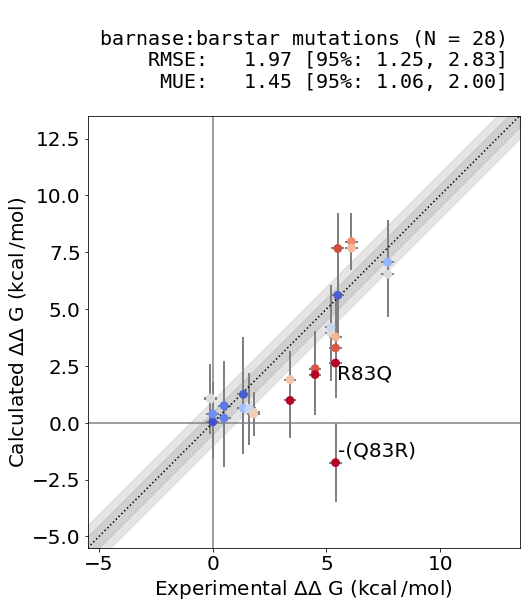

In [17]:
# Format data appropriately
x = [edge[2]["exp_DDG"] for edge in fe.graph.edges(data=True)]
y = [edge[2]["calc_DDG"] for edge in fe.graph.edges(data=True)]
xerr = np.asarray([edge[2]["exp_dDDG"] for edge in fe.graph.edges(data=True)])
yerr = np.asarray([edge[2]["calc_dDDG"] for edge in fe.graph.edges(data=True)])
x_data = np.asarray(x)
y_data = np.asarray(y)

# Generate the plot
filename = '/data/chodera/zhangi/perses_benchmark/repex/perses-bnbs-paper-fourth-attempt/cinnabar_plot_rest_10ns.pdf'
plot = plotting._master_plot(
    x_data,
    y_data,
    xerr=xerr,
    yerr=yerr,
    filename=filename,
    title="",
    target_name="barnase:barstar mutations",
    units=r'$\mathrm{kcal\,/mol}$', 
    figsize=10, 
    dpi=500,
    xy_lim=[-5.5, 13.5],
    data_labels=labels_accuracy,
#     data_labels=titles,
    font_sizes={"title":20, "labels": 20, "other": 20},
    scatter_kwargs={'s': 60}
)

## -Reverse vs Forward

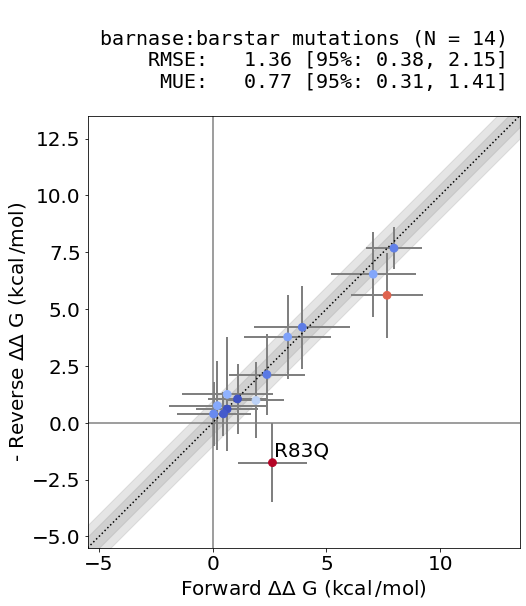

In [15]:
# Format the data appropriately
x = [entry[2] for i, entry in enumerate(to_plot) if i < 14] # forward
y = [entry[2] for i, entry in enumerate(to_plot) if i >= 14] # reverse
xerr =  [entry[3] for i, entry in enumerate(to_plot) if i < 14] # forward
yerr = [entry[3] for i, entry in enumerate(to_plot) if i >= 14] # reverse
x_data = np.asarray(x)
y_data = np.asarray(y)

# Generate the plot
filename = '/data/chodera/zhangi/perses_benchmark/repex/perses-bnbs-paper-fourth-attempt/cinnabar_plot_rest_internal_consistency_10ns.pdf'
plot = plotting._master_plot(
    x_data,
    y_data,
    xerr=xerr,
    yerr=yerr,
    filename=filename,
    title="",
    target_name="barnase:barstar mutations",
    xlabel="Forward",
    ylabel="- Reverse",
    units=r'$\mathrm{kcal\,/mol}$', 
    figsize=10, 
    dpi=500,
    xy_lim=[-5.5, 13.5],
    data_labels=labels_internal_consistency,
    font_sizes={"title":20, "labels": 20, "other": 20},
    scatter_kwargs={'s': 60})


## Table

In [11]:
# Format the data appropriately for table

titles = ["Y29F", "Y29A",  "W38F", "T42A", "W44F", "E76A", "E80A", "D35A", "D39A", "K27A", "R59A", "R83Q", "R87A", "H102A", "F29Y", "A29Y",  "F38W", "A42T", "F44W", "A76E", "A80E", "A35D", "A39D", "A27K", "A59R", "Q83R", "A87R", "A102H"]
experiment = [-0.1, 3.4, 1.6, 1.8, 0, 1.4, 0.5, 4.5, 7.7, 5.4, 5.2, 5.4, 5.5, 6.1, 0.1, -3.4, -1.6, -1.8, 0, -1.4, -0.5, -4.5, -7.7, -5.4, -5.2, -5.4, -5.5, -6.1]

to_plot = []

for sub_dir in range(28):
    ddg = compute_ddg(d_results[sub_dir]['apo']["Deltaf"][0, -1], d_results[sub_dir]['complex']["Deltaf"][0, -1])
    dddg = compute_error(d_results[sub_dir]['apo']["dDeltaf"][0, -1], d_results[sub_dir]['complex']["dDeltaf"][0, -1])
    if sub_dir in range(14):
        to_plot.append([titles[sub_dir], round(ddg, 2), round(dddg, 2), experiment[sub_dir], 10, 10, "forward"])
    else:
        to_plot.append([titles[sub_dir], round(ddg, 2), round(dddg, 2), experiment[sub_dir], 10, 10, "reverse"])


In [12]:
df = pd.DataFrame(to_plot, columns=["Mutation", r"Predicted $\Delta\Delta$G (kcal/mol)", "Error (kcal/mol)", "Experimental $\Delta\Delta$G (kcal/mol)", "Complex phase simulation time (ns/replica)", "Apo phase simulation time (ns/replica)", "Mutation direction"])

In [13]:
df

,Mutation,Predicted $\Delta\Delta$G (kcal/mol),Error (kcal/mol),Experimental $\Delta\Delta$G (kcal/mol),Complex phase simulation time (ns/replica),Apo phase simulation time (ns/replica),Mutation direction
0,Y29F,1.09,0.64,-0.1,10,10,forward
1,Y29A,1.90,0.62,3.4,10,10,forward
2,W38F,0.63,0.69,1.6,10,10,forward
3,T42A,0.47,0.43,1.8,10,10,forward
4,W44F,0.04,0.82,0.0,10,10,forward
5,E76A,0.64,1.00,1.4,10,10,forward
6,E80A,0.20,1.07,0.5,10,10,forward
7,D35A,2.38,0.83,4.5,10,10,forward
8,D39A,7.06,0.94,7.7,10,10,forward
9,K27A,3.29,0.96,5.4,10,10,forward


In [14]:
df.to_csv("/data/chodera/zhangi/perses_benchmark/repex/perses-bnbs-paper-fourth-attempt/table_10ns_arest.csv", index=False)